In [59]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [51]:
interest_rate = 0.07

df = pd.read_csv('file.csv', skiprows=22)
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
data = df[ [ 'Date', "Lo 20", "Qnt 2", "Qnt 3", "Qnt 4", "Hi 20" ] ]
data.iloc[:, 1:] = data.iloc[:, 1:] / 100 # Convert percentages to arithmetic returns
data

,Date,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20
0,1963-07-01,-0.0072,-0.0077,-0.0055,-0.0060,-0.0069
1,1963-07-02,0.0085,0.0087,0.0069,0.0073,0.0098
2,1963-07-03,0.0045,0.0092,0.0065,0.0063,0.0048
3,1963-07-05,0.0081,0.0060,0.0018,0.0031,0.0060
4,1963-07-08,-0.0045,-0.0070,-0.0048,-0.0049,-0.0079
...,...,...,...,...,...,...
15476,2024-12-24,0.0115,0.0094,0.0196,0.0099,0.0097
15477,2024-12-26,0.0026,0.0007,-0.0017,-0.0016,0.0021
15478,2024-12-27,-0.0166,-0.0080,-0.0142,-0.0121,-0.0104
15479,2024-12-30,-0.0157,-0.0095,-0.0131,-0.0072,-0.0122


<h3>Subquestion 1</h3>

In [53]:
for portfolio in data.columns[1:]:
    annualised_return = 252 * data[portfolio].mean() - interest_rate
    annualised_std = data[portfolio].std() * np.sqrt(252)
    annualised_sharpe = annualised_return / annualised_std
    print(f'Portfolio: {portfolio} | Return: {100 * annualised_return:3f} % | St. Dev.: {annualised_std:3f} | Sharpe: {annualised_sharpe:3f}')

Portfolio: Lo 20 | Return: 2.308259 % | St. Dev.: 0.196517 | Sharpe: 0.117459
Portfolio: Qnt 2 | Return: 3.519344 % | St. Dev.: 0.166460 | Sharpe: 0.211423
Portfolio: Qnt 3 | Return: 4.871721 % | St. Dev.: 0.164272 | Sharpe: 0.296565
Portfolio: Qnt 4 | Return: 5.023270 % | St. Dev.: 0.162457 | Sharpe: 0.309207
Portfolio: Hi 20 | Return: 5.758222 % | St. Dev.: 0.166251 | Sharpe: 0.346358


<h3>Subquestion 2</h3>

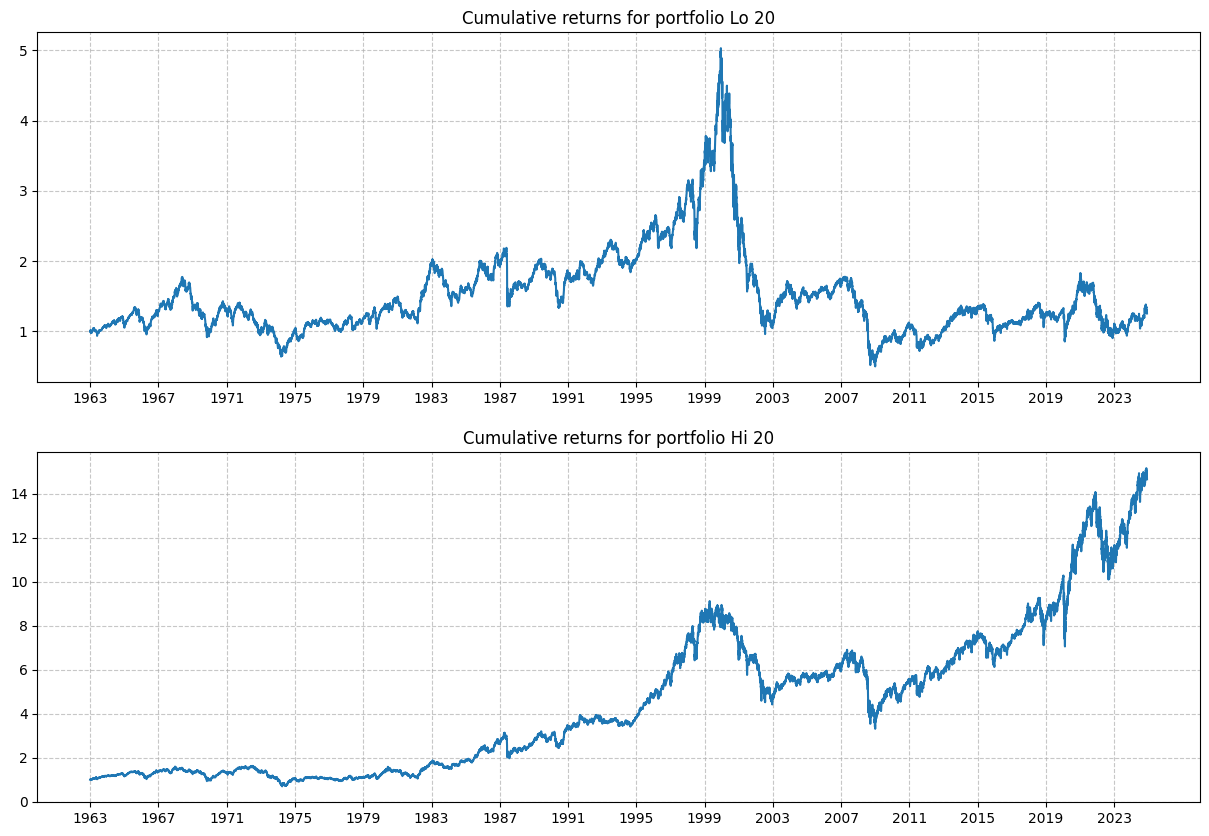

In [69]:
portfolios = [ 'Lo 20', 'Hi 20' ]

fig, axis = plt.subplots(2, 1, figsize=(15, 10))
for portfolio, ax in zip(portfolios, axis):
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.plot((1 + data[portfolio] - interest_rate / 252).cumprod())
    ax.set_xticks(range(0, len(data), 1000))
    ax.set_xticklabels(data['Date'][::1000].dt.year)
    ax.set_title(f'Cumulative returns for portfolio {portfolio}')

<h3>Subquestion 3-4</h3>

In [75]:
portfolios = [ 'Lo 20', 'Hi 20' ]
average_log_returns = {  }

for portfolio in portfolios:
    average_log_return = np.log(1 + data[portfolio] - interest_rate / 252).mean()
    average_log_returns[portfolio] = average_log_return

average_log_returns['Hi 20']/average_log_returns['Lo 20']
print(f"Average log returns for Hi 20 are {average_log_returns['Hi 20']/average_log_returns['Lo 20']:3f} times higher than for Lo 20")

Average log returns for Hi 20 are 11.863567 times higher than for Lo 20
